In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

dsbc_df = pd.read_sql_query('SELECT * FROM useducation;', con=engine)

# close the db connetion
engine.dispose()

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [7]:
dsbc_df.TOTAL_REVENUE.isnull().sum()

212

In [8]:
df2 = dsbc_df.copy()

In [9]:
df2.TOTAL_REVENUE.interpolate(inplace=True)

In [10]:
df2.TOTAL_REVENUE.isnull().sum()

0

In [11]:
df2.TOTAL_EXPENDITURE.isnull().sum()

212

In [12]:
df2.TOTAL_EXPENDITURE.interpolate(inplace=True)

In [13]:
df2.TOTAL_EXPENDITURE.isnull().sum()

0

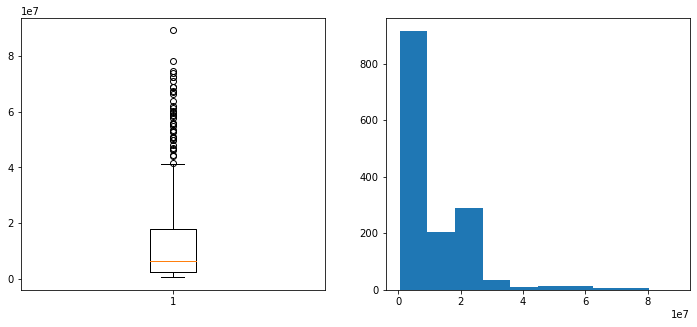

In [23]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(df2.TOTAL_REVENUE)
plt.subplot(1,2,2)
plt.hist(df2.TOTAL_REVENUE)
plt.show()

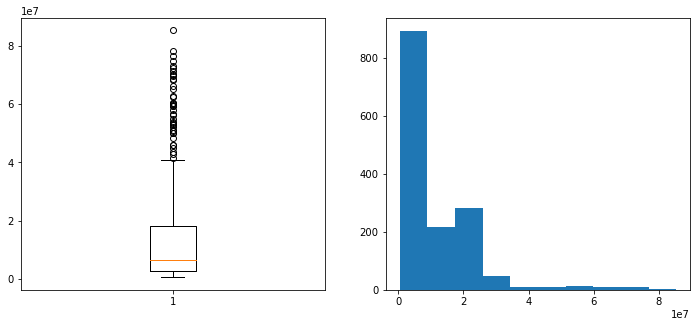

In [24]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(df2.TOTAL_EXPENDITURE)
plt.subplot(1,2,2)
plt.hist(df2.TOTAL_EXPENDITURE)
plt.show()

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

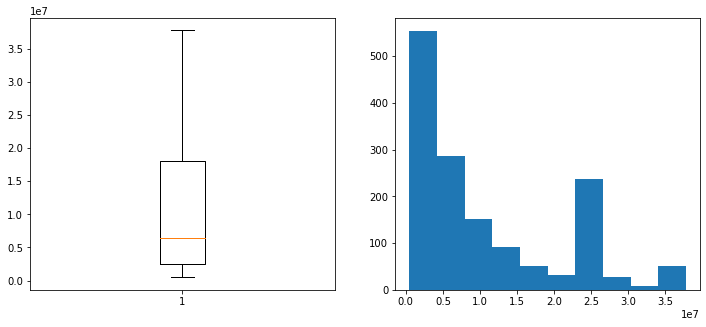

In [52]:
winsorized_df1 = winsorize(df2.TOTAL_REVENUE, (0, 0.03))

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(winsorized_df1)
plt.subplot(1,2,2)
plt.hist(winsorized_df1)
plt.show()

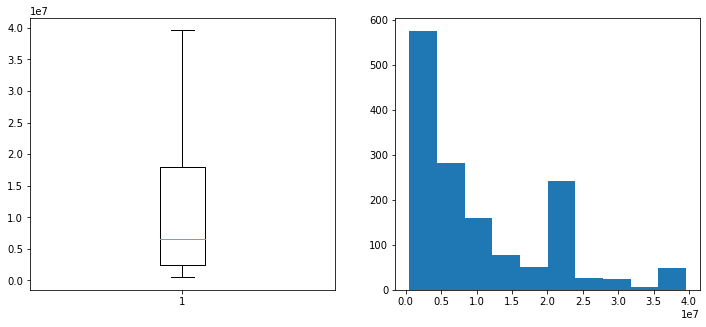

In [53]:
winsorized_df2 = winsorize(df2.TOTAL_EXPENDITURE, (0, 0.03))

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(winsorized_df)
plt.subplot(1,2,2)
plt.hist(winsorized_df)
plt.show()

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [40]:
df2['budget_deficit'] = df2.TOTAL_REVENUE - df2.TOTAL_EXPENDITURE

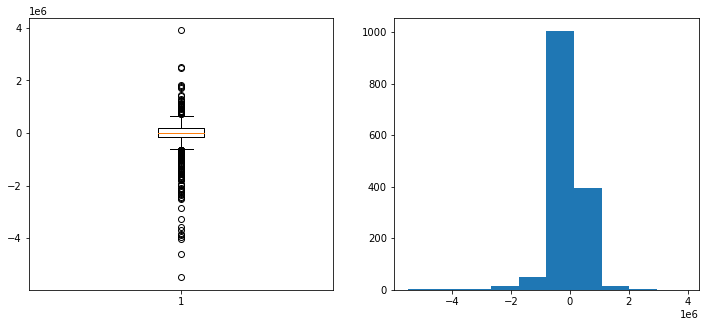

In [42]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(df2.budget_deficit)
plt.subplot(1,2,2)
plt.hist(df2.budget_deficit)
plt.show()

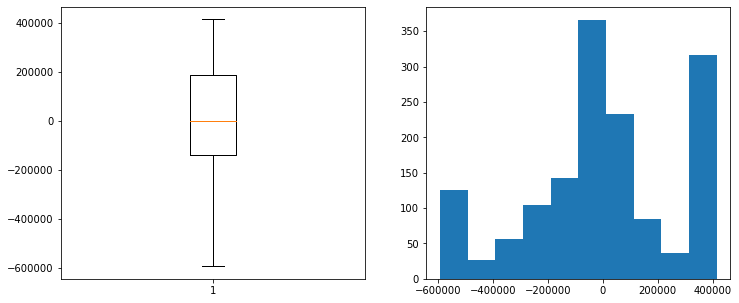

In [60]:
winsorized_df3 = winsorize(df2.budget_deficit, (0.065))

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(winsorized_df3)
plt.subplot(1,2,2)
plt.hist(winsorized_df3)
plt.show()

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [55]:
budget_deficit = winsorized_df1 - winsorized_df2

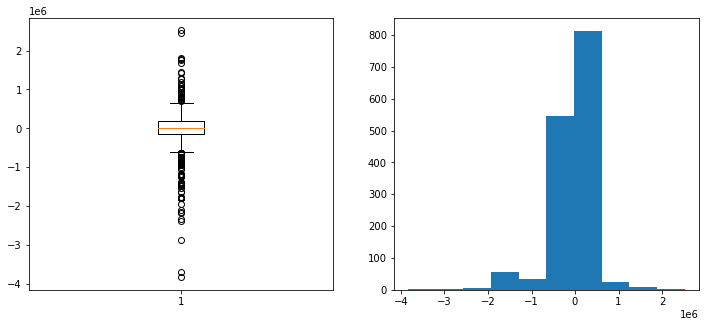

In [56]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(budget_deficit)
plt.subplot(1,2,2)
plt.hist(budget_deficit)
plt.show()

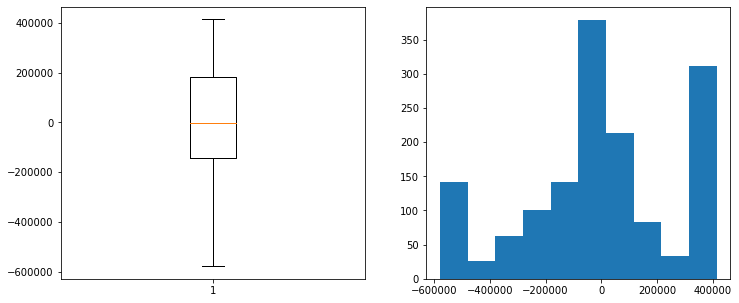

In [61]:
winsorized_df4 = winsorize(budget_deficit, (0.075))

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.boxplot(winsorized_df4)
plt.subplot(1,2,2)
plt.hist(winsorized_df4)
plt.show()

In [65]:
pd.Series(winsorized_df3).describe()

count      1492.000000
mean       4740.454424
std      286054.295003
min     -592845.000000
25%     -136814.750000
50%        -535.500000
75%      187628.500000
max      414013.000000
dtype: float64

In [66]:
pd.Series(winsorized_df4).describe()

count      1492.000000
mean        301.566354
std      287001.019852
min     -579443.000000
25%     -142821.750000
50%       -1681.000000
75%      180263.750000
max      414013.000000
dtype: float64